# Runge-Kutta Method (4th Order)

## Overview

The **4th-order Runge-Kutta method (RK4)** is one of the most widely used numerical methods for solving ordinary differential equations. It achieves fourth-order accuracy, meaning the global error is proportional to $O(h^4)$.

## Mathematical Formulation

Consider a first-order ODE:
$$\frac{dx}{dt} = f(t, x)$$

with initial condition $x(t_0) = x_0$.

### Algorithm

For each time step from $t_n$ to $t_{n+1} = t_n + h$:

1. Compute intermediate slopes:
   - $k_1 = f(t_n, x_n)$
   - $k_2 = f(t_n + \frac{h}{2}, x_n + \frac{h}{2}k_1)$
   - $k_3 = f(t_n + \frac{h}{2}, x_n + \frac{h}{2}k_2)$
   - $k_4 = f(t_n + h, x_n + hk_3)$

2. Update:
   $$x_{n+1} = x_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

### Error Analysis

| Error Type | Order |
|------------|-------|
| Local Truncation Error | $O(h^5)$ |
| Global Error | $O(h^4)$ |

### Why RK4 Works Better

RK4 samples the slope at multiple points within each step:
- $k_1$: slope at the beginning
- $k_2, k_3$: slopes at the midpoint (weighted more heavily)
- $k_4$: slope at the end

The weighted average provides a much better approximation than Euler's single slope evaluation.

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Problem

We solve the ODE:
$$\frac{dx}{dt} = \sin(t), \quad x(1) = 2$$

The analytical solution is:
$$x(t) = -\cos(t) + 2 + \cos(1)$$

In [2]:
# Number of discretization points
N = 10

# Time domain [t_start, t_end]
domain = [1, 5]

# ODE: dx/dt = f(t, x)
def f(t, x):
    return np.sin(t)

# Analytical solution for comparison
def analytical(t):
    return -np.cos(t) + 2 + np.cos(1)

# Initial condition
x_0 = 2.0

### Runge-Kutta 4th Order Function

In [3]:
def runge_kutta_4(t: np.ndarray, f: callable, x_0: float) -> np.ndarray:
    """
    Solve an ODE using the 4th-order Runge-Kutta method.
    
    Args:
        t: Array of time points (must be uniformly spaced)
        f: Function f(t, x) defining the ODE dx/dt = f(t, x)
        x_0: Initial condition x(t[0]) = x_0
    
    Returns:
        Array of solution values at each time point
    """
    dt = t[1] - t[0]  # Time step
    x = np.zeros_like(t)
    
    # Apply initial condition
    x[0] = x_0
    
    # Iterate through time steps
    for n in range(len(t) - 1):
        # Compute the four slopes
        k1 = f(t[n], x[n])
        k2 = f(t[n] + dt/2, x[n] + dt*k1/2)
        k3 = f(t[n] + dt/2, x[n] + dt*k2/2)
        k4 = f(t[n] + dt, x[n] + dt*k3)
        
        # RK4 update
        x[n + 1] = x[n] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x

### Solve and Visualize

In [4]:
# Create time grid
t = np.linspace(*domain, num=N)

# Solve using RK4
x_numerical = runge_kutta_4(t, f, x_0)

# Create fine grid for analytical solution
t_fine = np.linspace(*domain, num=500)

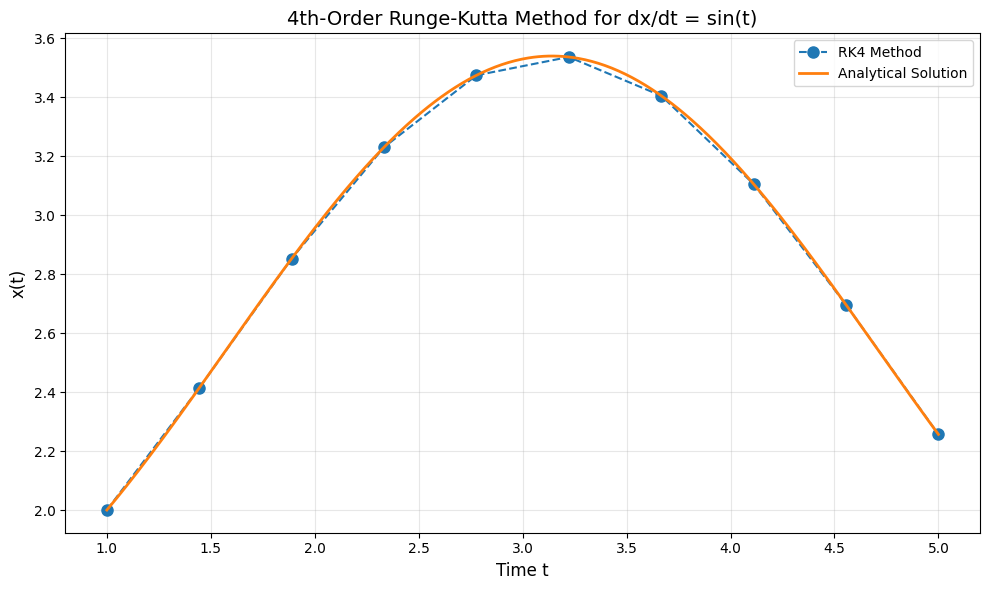

In [5]:
plt.figure(figsize=(10, 6))

# Plot numerical solution
plt.plot(t, x_numerical, 'o--', label='RK4 Method', markersize=8)

# Plot analytical solution
plt.plot(t_fine, analytical(t_fine), '-', label='Analytical Solution', linewidth=2)

plt.xlabel('Time t', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.title('4th-Order Runge-Kutta Method for dx/dt = sin(t)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Error Analysis

In [6]:
# Compute error at each point
error = np.abs(x_numerical - analytical(t))

print(f"Maximum absolute error: {np.max(error):.2e}")
print(f"Mean absolute error: {np.mean(error):.2e}")
print(f"Step size (dt): {t[1] - t[0]:.4f}")

Maximum absolute error: 2.09e-05
Mean absolute error: 1.22e-05
Step size (dt): 0.4444


## Comparison with Euler's Method

In [7]:
def euler_method(t, f, x_0):
    """Simple Euler method for comparison."""
    dt = t[1] - t[0]
    x = np.zeros_like(t)
    x[0] = x_0
    for n in range(len(t) - 1):
        x[n + 1] = x[n] + dt * f(t[n], x[n])
    return x

# Solve with both methods
x_rk4 = runge_kutta_4(t, f, x_0)
x_euler = euler_method(t, f, x_0)

# Compute errors
error_rk4 = np.abs(x_rk4 - analytical(t))
error_euler = np.abs(x_euler - analytical(t))

print(f"{'Method':<15} {'Max Error':<15} {'Mean Error':<15}")
print(f"{'-'*45}")
print(f"{'Euler':<15} {np.max(error_euler):<15.6f} {np.mean(error_euler):<15.6f}")
print(f"{'RK4':<15} {np.max(error_rk4):<15.2e} {np.mean(error_rk4):<15.2e}")
print(f"\nRK4 is {np.max(error_euler)/np.max(error_rk4):.0f}x more accurate!")

Method          Max Error       Mean Error     
---------------------------------------------
Euler           0.395849        0.176550       
RK4             2.09e-05        1.22e-05       

RK4 is 18898x more accurate!


## Summary

**RK4 Method** is:
- ✅ Fourth-order accuracy ($O(h^4)$)
- ✅ Widely used and trusted
- ✅ Good balance between accuracy and computational cost
- ❌ Requires 4 function evaluations per step
- ❌ Not ideal for stiff problems

### When to Use RK4
- General-purpose ODE solving
- When moderate accuracy is needed
- Non-stiff problems

For stiff problems or adaptive step sizes, consider using SciPy's `odeint` or `solve_ivp`.